In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The threshrold of 3.5 set as default is the usual value for MAD applications and it's very conservative. As explained by Jeff Miller, in his article, this values are often used in paper without a proper explanation. However, they can be justified by the commom standart deviation limits in commom distributions, such as gaussian and Chi-Squared.

> Miller, J. (1991). Reaction time analysis with outlier exclusion: Bias varies with sample
size. The Quarterly Journal of Experimental Psychology, 43(4), 907–912, http://dx.doi.org/10.1080/14640749108400962.

The $0.6745 \equiv \frac{1}{1.4826}$ constant is introduced to ensure that MAD converges to $\sigma$ for normal distribution 


In [3]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
        
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    mad = np.median(diff)
    
    modified_z_score = 0.6745 * diff / mad
    
    return modified_z_score > thresh

In [4]:
def double_mad_based_outlier(points, thresh=3.5):
    median = np.median(points, axis=0)
    diff = np.abs(points - median)
    
    left_mad = np.median(diff[points <= median])
    right_mad = np.median(diff[points >= median])
    mad = left_mad * np.ones(len(points))
    mad[points > median] = right_mad
    
    modified_z_score = 0.6745 * diff / mad
    modified_z_score[points == median] = 0
    
    return modified_z_score > thresh

In [5]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

In [6]:
def plot(x):
    fig, axes = plt.subplots(nrows=3)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, double_mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('Double MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

In [7]:
def generate(num):
    # Generate some data
    np.random.seed(112358)
    
    x = np.random.gamma(1, 1, num-3)

    # Add three outliers...
    x = np.r_[x, -3, 7, 12]
    print("Total Outliers\nPercentile: " , np.sum(percentile_based_outlier(x)) ,
          "\nMAD: " , np.sum(mad_based_outlier(x)) , 
          "\nDouble MAD: " , np.sum(double_mad_based_outlier(x)))
    plot(x)
    plt.show()

Total Outliers
Percentile:  2 
MAD:  3 
Double MAD:  3


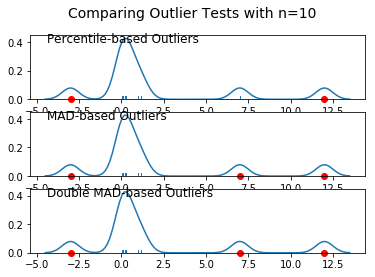

In [8]:
generate(10)

Total Outliers
Percentile:  4 
MAD:  3 
Double MAD:  3


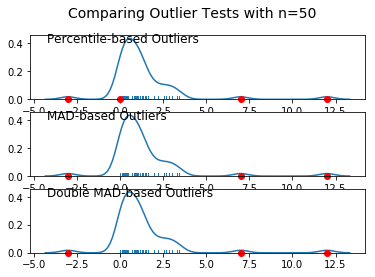

In [9]:
generate(50)

Total Outliers
Percentile:  6 
MAD:  5 
Double MAD:  3


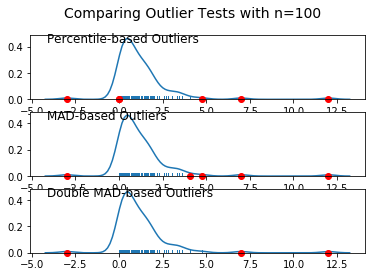

In [10]:
generate(100)

Total Outliers
Percentile:  50 
MAD:  54 
Double MAD:  18


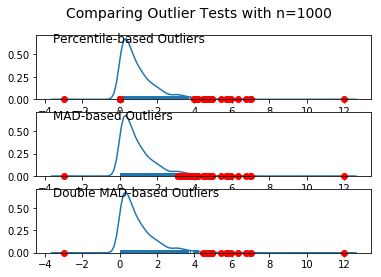

In [11]:
generate(1000)